# TODO:

 * Rainfall
 * Incidence
 * Immunity outputs
 * Separate models

In [17]:
import pandas as pd
import numpy as np
import math
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from multiprocessing import Pool
seed = 42

In [18]:
with Pool(50) as p:
    samples = pd.concat(p.map(pd.read_csv, glob.glob('./outputs/det/*.csv')))
samples = samples.reset_index(drop=True)

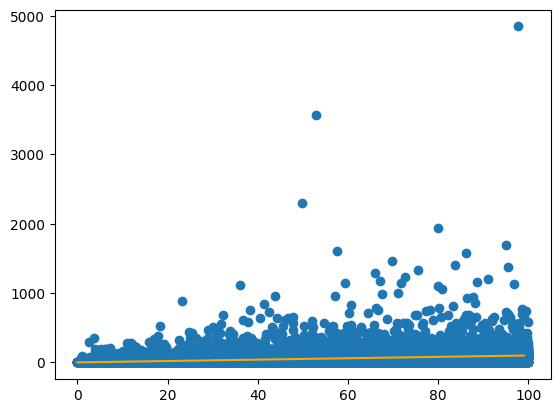

In [19]:
plt.scatter(samples.init_EIR, samples.EIR)
plt.plot(np.arange(100), np.arange(100), color='orange')

In [20]:
samples = samples.drop(samples[samples.EIR == -1].index).reset_index(drop=True)

In [21]:
def get_rainfall(g0, g, h, floor = 0.001):
    t = np.arange(365)
    r = np.repeat(np.expand_dims(g0, 1), 365, axis=1)
    for i in range(3):
        r += g[:, i, np.newaxis] * np.cos(2 * math.pi * t * (i + 1) / 365)
        r += h[:, i, np.newaxis] * np.sin(2 * math.pi * t * (i + 1) / 365)
    return np.maximum(r, floor)

rainfall = get_rainfall(samples.ssa0.to_numpy(), samples[['ssa1', 'ssa2', 'ssa3']].to_numpy(), samples[['ssb1', 'ssb2', 'ssb3']].to_numpy())

In [22]:
output_columns = [f'prev_{i}' for i in range(1, 366)]
outputs = samples[output_columns]
features = samples.drop(output_columns + ['init_EIR', 'ssa1', 'ssa2', 'ssa3', 'ssb1', 'ssb2', 'ssb3'], 1)
n_features = len(features.columns)
n_outputs = len(outputs.columns)

/tmp/ipykernel_2398/3807434779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = samples.drop(output_columns + ['init_EIR', 'ssa1', 'ssa2', 'ssa3', 'ssb1', 'ssb2', 'ssb3'], 1)


(array([1.040e+02, 1.160e+02, 1.790e+02, 1.830e+02, 2.170e+02, 2.220e+02,
        2.620e+02, 2.880e+02, 2.930e+02, 3.370e+02, 3.670e+02, 4.260e+02,
        4.120e+02, 4.360e+02, 4.580e+02, 4.840e+02, 5.470e+02, 6.000e+02,
        5.970e+02, 7.060e+02, 6.970e+02, 7.440e+02, 7.890e+02, 8.160e+02,
        9.100e+02, 9.100e+02, 1.038e+03, 1.151e+03, 1.121e+03, 1.162e+03,
        1.217e+03, 1.206e+03, 1.255e+03, 1.235e+03, 1.174e+03, 1.142e+03,
        1.051e+03, 1.023e+03, 9.460e+02, 8.720e+02, 7.970e+02, 6.950e+02,
        6.790e+02, 6.050e+02, 5.580e+02, 4.690e+02, 4.760e+02, 4.060e+02,
        3.640e+02, 3.550e+02, 3.440e+02, 2.760e+02, 2.620e+02, 2.790e+02,
        2.340e+02, 1.890e+02, 1.710e+02, 1.850e+02, 1.670e+02, 1.230e+02,
        1.350e+02, 1.090e+02, 1.080e+02, 1.040e+02, 8.700e+01, 7.000e+01,
        7.100e+01, 5.800e+01, 4.300e+01, 5.300e+01, 3.800e+01, 3.600e+01,
        4.300e+01, 3.600e+01, 1.800e+01, 2.500e+01, 1.800e+01, 1.700e+01,
        2.000e+01, 2.500e+01, 1.700e+0

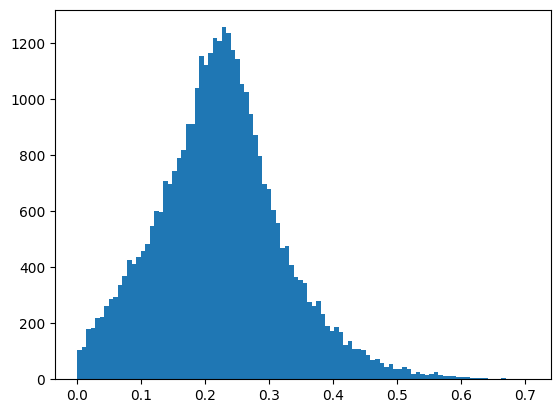

In [28]:
plt.hist(np.mean(outputs.to_numpy(), axis=1), bins=100)

(array([396., 396., 414., 388., 367., 386., 380., 392., 385., 393., 375.,
        393., 401., 377., 374., 390., 364., 373., 365., 390., 377., 375.,
        383., 371., 386., 367., 354., 368., 369., 392., 366., 387., 372.,
        390., 386., 372., 388., 369., 371., 378., 381., 351., 364., 382.,
        391., 363., 369., 379., 361., 358., 384., 351., 351., 368., 365.,
        356., 371., 354., 355., 369., 354., 359., 366., 377., 369., 370.,
        350., 359., 336., 354., 347., 365., 326., 361., 354., 350., 365.,
        345., 380., 361., 375., 338., 356., 339., 354., 333., 343., 326.,
        342., 360., 369., 330., 344., 329., 337., 330., 338., 337., 352.,
        330.]),
 array([5.44787175e-04, 1.00053368e+00, 2.00052258e+00, 3.00051148e+00,
        4.00050037e+00, 5.00048927e+00, 6.00047816e+00, 7.00046706e+00,
        8.00045596e+00, 9.00044485e+00, 1.00004337e+01, 1.10004226e+01,
        1.20004115e+01, 1.30004004e+01, 1.40003893e+01, 1.50003782e+01,
        1.60003671e+01, 1.7000

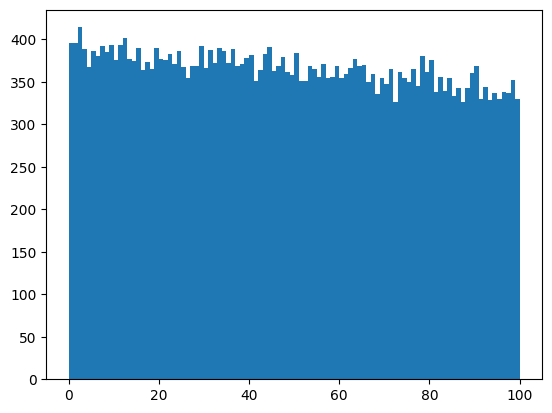

In [31]:
plt.hist(samples.init_EIR, bins=100)

(array([350., 416., 377., 384., 399., 375., 390., 363., 367., 388., 408.,
        365., 378., 398., 363., 405., 359., 408., 411., 372., 412., 382.,
        387., 373., 380., 382., 360., 398., 413., 386., 414., 361., 368.,
        415., 408., 396., 380., 389., 394., 378., 395., 387., 388., 390.,
        409., 390., 392., 388., 376., 388., 317., 345., 332., 332., 336.,
        358., 348., 335., 359., 304., 328., 317., 302., 284., 278., 294.,
        261., 257., 257., 264., 266., 263., 259., 249., 244., 222., 225.,
        209., 209., 252., 212., 225., 218., 189., 198., 187., 208., 171.,
        176., 169., 180., 173., 161., 156., 136., 145., 148., 142., 148.,
        118.]),
 array([2.65778481e-04, 1.00021570e+00, 2.00016562e+00, 3.00011553e+00,
        4.00006545e+00, 5.00001537e+00, 5.99996529e+00, 6.99991521e+00,
        7.99986513e+00, 8.99981505e+00, 9.99976497e+00, 1.09997149e+01,
        1.19996648e+01, 1.29996147e+01, 1.39995646e+01, 1.49995146e+01,
        1.59994645e+01, 1.6999

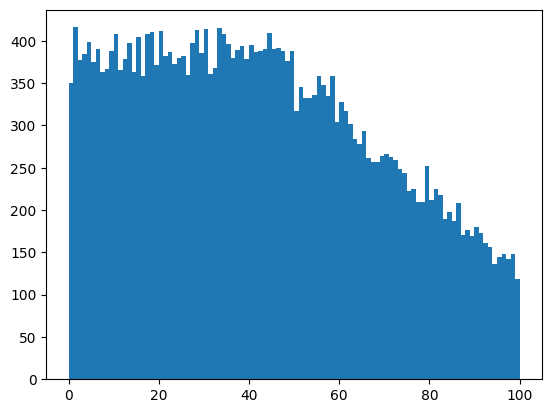

In [32]:
plt.hist(samples.EIR[samples.EIR.between(0, 100)], bins=100)

In [10]:
idx_train, idx_test = train_test_split(
    np.arange(len(outputs)), #np.arange(100000),
    test_size=0.2,
    random_state=seed
)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, Model

In [12]:
X_train = features.iloc[idx_train]
y_train = outputs.iloc[idx_train]
rainfall_train = rainfall[idx_train]
X_test = features.iloc[idx_test]
y_test = outputs.iloc[idx_test]
rainfall_test = rainfall[idx_test]

scaler = layers.Normalization()
scaler.adapt(X_train.to_numpy())

rainfall_scaler = layers.Normalization(axis=None)
rainfall_scaler.adapt(rainfall_train)

prev_scaler = layers.Normalization(axis=None)
prev_scaler.adapt(y_train)

2022-11-04 15:27:12.578535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 15:27:20.610581: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22337 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:27:00.0, compute capability: 8.6
2022-11-04 15:27:20.632492: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22337 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:28:00.0, compute capability: 8.6
2022-11-04 15:27:20.652627: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:2 w

In [15]:
def create_model(
    optimiser='adam',
    n_hidden=3,
    units=512,
    dropout=.1,
    loss='mse',
    hidden_activation='relu',
    hidden_initialiser='he_normal',
    output_activation='linear',
    output_initialiser='glorot_normal'
):
    input_layer = layers.Input(shape=(n_features,), dtype='float32')
    rainfall_layer = layers.Input(shape=(365,), dtype='float32')
    output = tf.concat([scaler(input_layer), rainfall_scaler(rainfall_layer)], 1)
    for i in range(n_hidden):
        output = layers.Dense(
            units,
            activation=hidden_activation,
            kernel_initializer=hidden_initialiser
        )(output)
        output = layers.Dropout(dropout)(output)
    output = layers.Dense(n_outputs, activation=output_activation, kernel_initializer=output_initialiser)(output)
    model = Model(inputs=[input_layer, rainfall_layer], outputs = [output])
    model.compile(loss=loss, optimizer=optimiser, metrics='mse')
    return model

In [16]:
model = create_model()
model.fit((X_train, rainfall_train), y_train, batch_size=100, epochs=100)

Epoch 1/100
 28/286 [=>............................] - ETA: 1s - loss: 0.1552 - mse: 0.1552

2022-11-04 15:27:46.219665: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


286/286 [==============================] - 3s 5ms/step - loss: 0.0246 - mse: 0.0246
Epoch 2/100
286/286 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065
Epoch 3/100
286/286 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053
Epoch 4/100
286/286 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046
Epoch 5/100
286/286 [==============================] - 2s 6ms/step - loss: 0.0042 - mse: 0.0042
Epoch 6/100
286/286 [==============================] - 2s 6ms/step - loss: 0.0039 - mse: 0.0039
Epoch 7/100
286/286 [==============================] - 1s 5ms/step - loss: 0.0038 - mse: 0.0038
Epoch 8/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0037 - mse: 0.0037
Epoch 9/100
286/286 [==============================] - 2s 5ms/step - loss: 0.0036 - mse: 0.0036
Epoch 10/100
286/286 [==============================] - 2s 6ms/step - loss: 0.0034 - mse: 0.0034
Epoch 11/100
286/286 [=============================

In [53]:
def create_model(
    optimiser='adam',
    n_representation_layer=2,
    n_projection_layer=2,
    units=512,
    dropout=.1,
    loss='mse',
    hidden_activation='relu',
    hidden_initialiser='he_normal',
    output_activation='linear',
    output_initialiser='glorot_normal'
):
    input_layer = layers.Input(shape=(n_features,), dtype='float32')
    output = scaler(input_layer)
    for i in range(n_representation_layer):
        output = layers.Dense(
            units,
            activation=hidden_activation,
            kernel_initializer=hidden_initialiser
        )(output)
        output = layers.Dropout(dropout)(output)
    prev_output = rainfall_output = output
    for i in range(n_projection_layer):
        prev_output = layers.Dense(
            units,
            activation=hidden_activation,
            kernel_initializer=hidden_initialiser
        )(prev_output)
        prev_output = layers.Dropout(dropout)(prev_output)
        rainfall_output = layers.Dense(
            units,
            activation=hidden_activation,
            kernel_initializer=hidden_initialiser
        )(rainfall_output)
        rainfall_output = layers.Dropout(dropout)(rainfall_output)
    prev_output = layers.Dense(n_outputs, activation=output_activation, kernel_initializer=output_initialiser)(prev_output)
    rainfall_output = layers.Dense(n_outputs, activation=output_activation, kernel_initializer=output_initialiser)(rainfall_output)
    model = Model(inputs = [input_layer], outputs = [prev_output, rainfall_output])
    model.compile(loss=loss, optimizer=optimiser, metrics='mse')
    return model

In [54]:
model = create_model()
model.fit(X_train, (prev_scaler(y_train), rainfall_scaler(rainfall_train)), batch_size=100, epochs=100)

Epoch 1/100
233/233 [==============================] - 3s 7ms/step - loss: 0.9770 - dense_38_loss: 0.5553 - dense_39_loss: 0.4217 - dense_38_mse: 0.5553 - dense_39_mse: 0.4217
Epoch 2/100
233/233 [==============================] - 2s 7ms/step - loss: 0.4376 - dense_38_loss: 0.3068 - dense_39_loss: 0.1308 - dense_38_mse: 0.3068 - dense_39_mse: 0.1308
Epoch 3/100
233/233 [==============================] - 2s 8ms/step - loss: 0.3314 - dense_38_loss: 0.2278 - dense_39_loss: 0.1035 - dense_38_mse: 0.2278 - dense_39_mse: 0.1035
Epoch 4/100
233/233 [==============================] - 1s 6ms/step - loss: 0.2823 - dense_38_loss: 0.1923 - dense_39_loss: 0.0899 - dense_38_mse: 0.1923 - dense_39_mse: 0.0899
Epoch 5/100
233/233 [==============================] - 2s 7ms/step - loss: 0.2549 - dense_38_loss: 0.1717 - dense_39_loss: 0.0832 - dense_38_mse: 0.1717 - dense_39_mse: 0.0832
Epoch 6/100
233/233 [==============================] - 2s 7ms/step - loss: 0.2379 - dense_38_loss: 0.1608 - dense_39_los

In [55]:
y_hat = model.predict(X_test)

182/182 [==============================] - 1s 6ms/step


Text(0, 0.5, 'true')

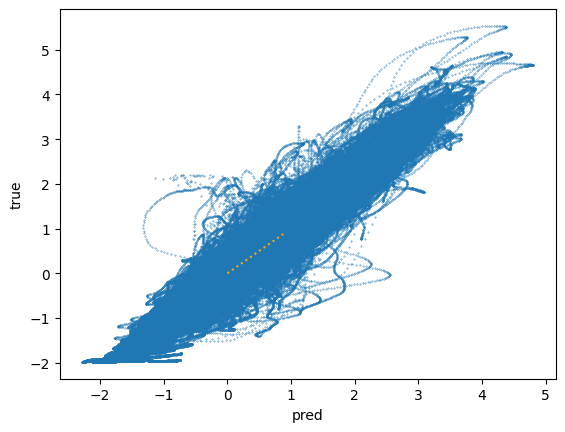

In [56]:
plt.scatter(y_hat[0].flatten(), prev_scaler(y_test.to_numpy().flatten()), s=0.1)
plt.plot(np.linspace(0, 0.9), np.linspace(0, 0.9), linestyle=':', color='orange')
plt.xlabel('pred')
plt.ylabel('true')

Text(0, 0.5, 'true')

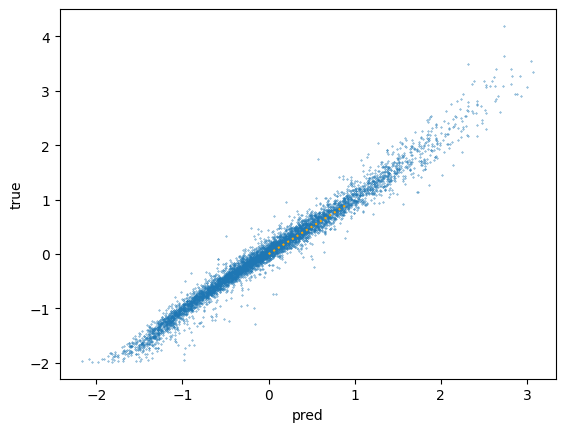

In [57]:
plt.scatter(np.mean(y_hat[0], axis=1), np.mean(prev_scaler(y_test), axis=1), s=0.1)
plt.plot(np.linspace(0, 0.9), np.linspace(0, 0.9), linestyle=':', color='orange')
plt.xlabel('pred')
plt.ylabel('true')

In [12]:
import keras_tuner as kt

In [13]:
def bulid_hypermodel(hp):
    return create_model(
        n_hidden = hp.Int("n_hidden", min_value=1, max_value=5, step=1),
        units = hp.Int("units", min_value=32, max_value=512, step=32),
        dropout = hp.Float("dropout", min_value=0., max_value=.2, step=.01),
        loss = hp.Choice("loss", ['mse', 'log_cosh']),
        hidden_activation = hp.Choice("hidden_activation", ['relu', 'elu']),
        output_activation = hp.Choice("output_activation", ['linear', 'softmax'])
    )

In [14]:
tuner = kt.Hyperband(
    hypermodel=bulid_hypermodel,
    objective="val_mse",
    max_epochs=100,
    seed=42,
    overwrite=True,
    directory="hyperparameters",
    project_name="det",
)

In [15]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
n_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.2, 'step': 0.01, 'sampling': None}
loss (Choice)
{'default': 'mse', 'conditions': [], 'values': ['mse', 'log_cosh'], 'ordered': False}
hidden_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu'], 'ordered': False}
output_activation (Choice)
{'default': 'linear', 'conditions': [], 'values': ['linear', 'softmax'], 'ordered': False}


In [16]:
X_hyp_train, X_hyp_val, y_hyp_train, y_hyp_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=seed
)

In [17]:
tuner.search(
    X_hyp_train,
    y_hyp_train,
    validation_data=(X_hyp_val, y_hyp_val),
    callbacks=[tf.keras.callbacks.EarlyStopping("mse", min_delta=1e-10, patience=5)]
)

Trial 230 Complete [00h 02m 17s]
val_mse: 0.00022005359642207623

Best val_mse So Far: 9.33476330828853e-05
Total elapsed time: 02h 25m 44s

Search: Running Trial #231

Value             |Best Value So Far |Hyperparameter
4                 |4                 |n_hidden
192               |96                |units
0.02              |0                 |dropout
mse               |mse               |loss
elu               |elu               |hidden_activation
linear            |linear            |output_activation
34                |100               |tuner/epochs
12                |34                |tuner/initial_epoch
2                 |4                 |tuner/bracket
1                 |4                 |tuner/round
0225              |0144              |tuner/trial_id

Epoch 13/34
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 14/34
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0023 - 

KeyboardInterrupt: 

623/623 [==============================] - 1s 1ms/step


Text(0, 0.5, 'true')

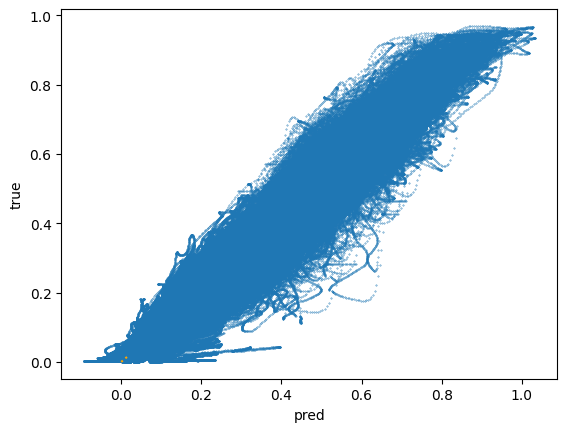

In [38]:
bm = tuner.get_best_models(num_models=1)[0]
y_hat = model.predict(X_test)
plt.scatter(y_hat.flatten(), y_test.to_numpy().flatten(), s=0.1)
plt.plot(np.linspace(0, 0.02), np.linspace(0, 0.02), linestyle=':', color='orange')
plt.xlabel('pred')
plt.ylabel('true')

In [39]:
tuner.results_summary()

Results summary
Results in hyperparameters/eq
Showing 10 best trials
Trial summary
Hyperparameters:
n_hidden: 4
units: 128
dropout: 0.09
loss: log_cosh
hidden_activation: elu
output_activation: linear
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
Score: 0.0011498170206323266
Trial summary
Hyperparameters:
n_hidden: 3
units: 96
dropout: 0.07
loss: log_cosh
hidden_activation: elu
output_activation: linear
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0238
Score: 0.0012141329934820533
Trial summary
Hyperparameters:
n_hidden: 3
units: 192
dropout: 0.04
loss: mse
hidden_activation: relu
output_activation: linear
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0219
Score: 0.0015096659772098064
Trial summary
Hyperparameters:
n_hidden: 3
units: 96
dropout: 0.09
loss: log_cosh
hidden_activation: elu
output_activation: linear
tuner/epochs: 100
tuner/initial_epoch:

In [15]:
model.save('models/det')

INFO:tensorflow:Assets written to: models/det/assets
